In [1]:
!pip install powerlaw
!pip install cdlib
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.6/263.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.9 MB/s eta 0:00:00


In [5]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import powerlaw
import cdlib
warnings.filterwarnings('ignore')
from cdlib import evaluation, ensemble, algorithms

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'graph_tool', 'bayanpy', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [6]:
g = nx.Graph()

# Read data from CSV file
with open('/content/weighted_graph.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header row
    for row in reader:
        source, target, weight = row
        g.add_edge(source, target, weight=float(weight))

len(g.edges())

725330

label propagation

In [4]:
lp_coms = algorithms.label_propagation(g)

In [43]:
communities = lp_coms.communities # Identified Clustering
communities

[['Jasper Legen',
  'Stand Atlantic',
  'Glenine Jephcote',
  'Pembroke Stollberger',
  'Constancy Gawler',
  'Cornelius',
  'Charlotte Lawrence',
  'Syd Matters',
  'Kippy Cicetti',
  'Jagwar Twin',
  'Omarion',
  'Jock Panks',
  'The Band',
  'The Notations',
  'Harmless',
  'Ruperto Bullock',
  'Alexa Sheer',
  'Tai Verdes',
  'Ark Patrol',
  'HEARTSTEEL',
  'Sarine Scherme',
  'Nick Drake',
  'Zero',
  'Stirling Lillgard',
  'Bram Gare',
  'Morty Grimmer',
  'Silvester Havock',
  'Shabaka',
  'Ian',
  'Adam Melchor',
  'Myranda Josh',
  'Alizée',
  'flower face',
  'Husain Conibere',
  'Tisha Ratcliff',
  'Lola Amour',
  'Hedwiga Handke',
  'Chelsy Kornel',
  'Dionisio Oxbrow',
  'Rutledge Claridge',
  'Rossy Durrant',
  'Peggie Iacovozzo',
  'Horatio Fyers',
  'Palace',
  'Modestia Bails',
  'Florry Purrier',
  'Cil',
  "Melody's Echo Chamber",
  'OKAY KAYA',
  'Franciska Berling',
  'Cazzu',
  "Noel Gallagher's High Flying Birds",
  'Melamie Mayor',
  'Brian Eno',
  'Jeff Buckley

In [ ]:
# Numero di comunità
num_communities = len(communities)
print(f"Numero di comunità: {num_communities}")

    # Dimensione massima delle comunità
max_community_size = max(len(community) for community in communities)
print(f"Dimensione massima delle comunità: {max_community_size}")

Numero di comunità: 163
Dimensione massima delle comunità: 5728


In [ ]:
from cdlib import NodeClustering
node_clustering = NodeClustering(communities, g, "label_propagation")

# Calcolo della modularità
modularity = evaluation.newman_girvan_modularity(g, node_clustering).score
print(f"Modularità: {modularity}")

# Calcolo della conductance
conductance = evaluation.conductance(g, node_clustering).score
print(f"Conductance: {conductance}")

Modularità: 0.45199674340561613
Conductance: 0.2819428768867233


In [ ]:
# Calcolo di Average Internal Degree (AID)
internal_degrees = []
for community in communities:
    subgraph = g.subgraph(community)
    internal_degree = sum(dict(subgraph.degree()).values()) / len(community)
    internal_degrees.append(internal_degree)
aid = sum(internal_degrees) / num_communities
print(f"Average Internal Degree (AID): {aid}")

# Calcolo di Internal Edge Density (IED)
edge_densities = []
for community in communities:
    subgraph = g.subgraph(community)
    possible_edges = len(community) * (len(community) - 1) / 2
    edge_density = subgraph.number_of_edges() / possible_edges if possible_edges > 0 else 0
    edge_densities.append(edge_density)
ied = sum(edge_densities) / num_communities
print(f"Internal Edge Density (IED): {ied}")

Average Internal Degree (AID): 9.774758492304088
Internal Edge Density (IED): 0.7230989197075177


In [ ]:
lp_coms.average_internal_degree()

FitnessResult(min=1.0, max=319.8003913894325, score=9.7747584923041, std=30.57183925799476)

In [17]:
from cdlib import evaluation

print("Average Internal Degree:", lp_coms.average_internal_degree())
print("Internal Edge Density:", lp_coms.internal_edge_density())
print("Conductance:", lp_coms.conductance())
print("Erdos Renyi Modularity:", lp_coms.erdos_renyi_modularity())
print("Newman Girvan Modularity:", lp_coms.newman_girvan_modularity())
print("Modularity Density:", lp_coms.modularity_density())
print("Z Modularity:", lp_coms.z_modularity())
print("Triangle Partecipation Ratio:", lp_coms.triangle_participation_ratio())

print("N_Community:", len(lp_coms.communities))

max_com_len = 0
for com in lp_coms.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print("Max_Dim_Community:", max_com_len)

Average Internal Degree: FitnessResult(min=1.0, max=319.8003913894325, score=9.7747584923041, std=30.57183925799476)
Internal Edge Density: FitnessResult(min=0.027424002544060137, max=1.0, score=0.7230989197075179, std=0.2817535892192743)
Conductance: FitnessResult(min=0.0, max=0.75, score=0.2819428768867233, std=0.19726628936846052)
Erdos Renyi Modularity: FitnessResult(min=None, max=None, score=0.5891983542036816, std=None)
Newman Girvan Modularity: FitnessResult(min=None, max=None, score=0.45199674340561613, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=1181.2666020563813, std=None)
Z Modularity: FitnessResult(min=None, max=None, score=0.8851388848432655, std=None)
Triangle Partecipation Ratio: FitnessResult(min=0.0, max=1.0, score=0.515906263924436, std=0.4603683787263565)
N_Community: 163
Max_Dim_Community: 5728


In [ ]:
lp_coms.overlap # Wehter the clustering is overlapping or not


False

In [46]:
# Calcola la coverage
def calculate_coverage(G, community_list):
    total_edges = G.number_of_edges()
    intra_community_edges = 0

    for community in community_list:
        subgraph = G.subgraph(community)
        intra_community_edges += subgraph.number_of_edges()

    coverage_value = intra_community_edges / total_edges
    return coverage_value

coverage_value = calculate_coverage(g, communities)
print(f"Coverage: {coverage_value}")

Coverage: 0.9291977444749286


In [18]:
#Per plottare le communities per dimensione
def plot_communities_dimentions(coms):
    myd = {}
    for t in coms:
        lunghezza = len(t)

        if str(lunghezza) in myd:
            myd[str(lunghezza)] = myd[str(lunghezza)] + 1
        else:
            myd[str(lunghezza)] = 1

    print(myd)
    plt.figure(figsize=(20,5))
    plt.bar(myd.keys(), myd.values(), color='b')

{'5728': 1, '1022': 1, '332': 1, '274': 1, '230': 1, '219': 1, '168': 1, '163': 1, '119': 1, '114': 1, '99': 1, '97': 1, '86': 1, '84': 1, '72': 1, '67': 1, '50': 1, '49': 1, '48': 1, '47': 1, '45': 1, '42': 2, '40': 1, '36': 1, '31': 1, '28': 1, '26': 1, '24': 3, '19': 1, '17': 1, '16': 3, '15': 1, '14': 1, '13': 2, '12': 4, '11': 2, '10': 1, '9': 3, '8': 5, '7': 2, '6': 9, '5': 5, '4': 11, '3': 27, '2': 54}


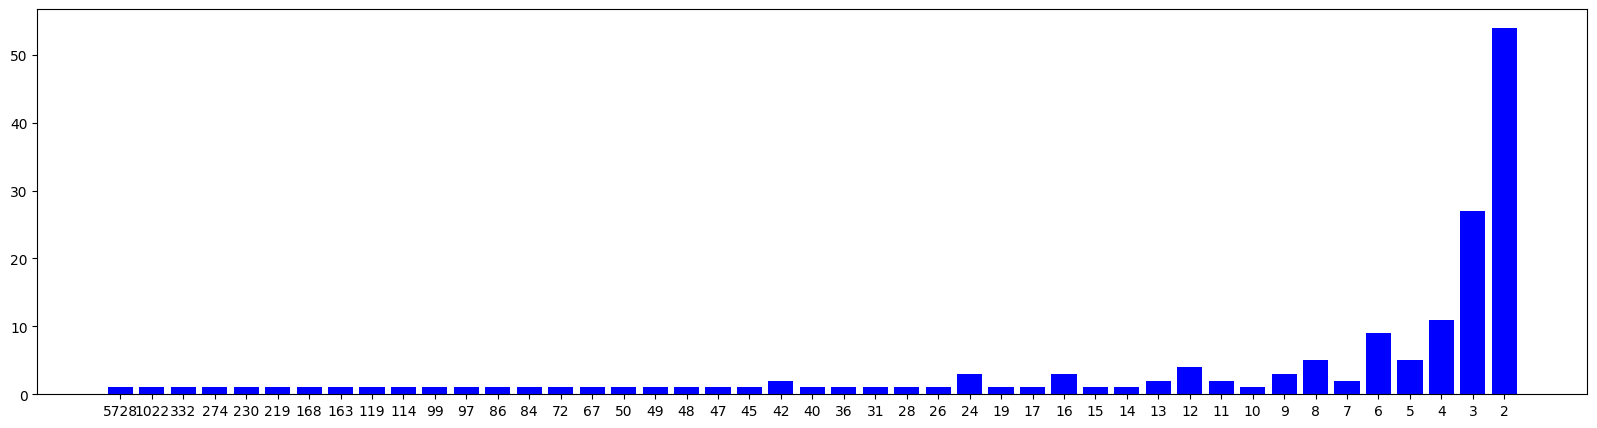

In [19]:
labelprop_tuple = [tuple(x) for x in lp_coms.communities]
plot_communities_dimentions(labelprop_tuple)

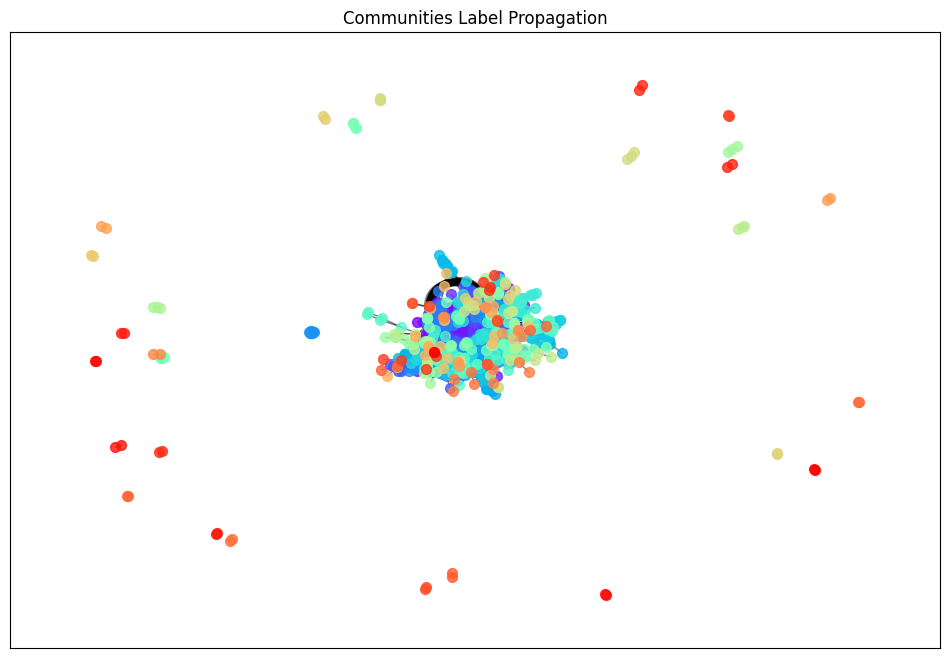

In [ ]:
pos = nx.spring_layout(g)
plt.figure(figsize=(12, 8))

colors = plt.cm.rainbow(np.linspace(0, 1, len(communities)))

for community, color in zip(communities, colors):
    nx.draw_networkx_nodes(g, pos, nodelist=community, node_color=[color], node_size=50, alpha=0.8)

nx.draw_networkx_edges(g, pos, alpha=0.5)
plt.title("Communities Label Propagation")
plt.show()

In [ ]:
#lp_coms.average_internal_degree(summary=False)


LOUVAIN

In [9]:
from cdlib import evaluation
louv_coms = algorithms.louvain(g)

cond_louv = evaluation.conductance(g,louv_coms)
IED_louv = evaluation.internal_edge_density(g,louv_coms)
mod_louv = evaluation.z_modularity(g,louv_coms)

In [21]:
res_df = {"randomize": [], "resolution":[], "AID": [], "IED": [], "Conductance":[], "Modularity": [], "N_Community": [], "Max_Dim_Community": []}
path = '/content/'

In [22]:
for j in [True, False]:
    for i in [x/10 for x in range(0, 10)]:
        print(f"> Louvain opt for resolution = {i} and randomize = {j}")

        res_df["randomize"].append(j)
        res_df["resolution"].append(i)

        louvain_coms = cdlib.algorithms.louvain(g, weight = "Count", resolution=i, randomize=j)
        res_df["AID"].append(louvain_coms.average_internal_degree().score)
        res_df["IED"].append(louvain_coms.internal_edge_density().score)
        res_df["Conductance"].append(louvain_coms.conductance().score)
        res_df["Modularity"].append(louvain_coms.newman_girvan_modularity().score)
        res_df["N_Community"].append(len(louvain_coms.communities))
        max_com_len = 0
        for com in louvain_coms.communities:
            if len(com) > max_com_len:
                max_com_len = len(com)
        res_df["Max_Dim_Community"].append(max_com_len)

        print("************ ------------------ *******")
final_df = pd.DataFrame(res_df)

> Louvain opt for resolution = 0.0 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.1 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.2 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.3 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.4 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.5 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.6 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.7 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.8 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.9 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.0 and r

In [23]:
final_df.to_csv(path+"louvain_grid_result.csv", index=False)

In [24]:
final_df = pd.read_csv(path+"louvain_grid_result.csv")

In [25]:
final_df.loc[[1,2, 3, 4, 5, 6, 7, 8, 9]]

randomize  resolution        AID       IED  Conductance  Modularity  \
1       True         0.1   3.402132  0.419911     0.819570    0.463203   
2       True         0.2   3.235560  0.433683     0.820306    0.477226   
3       True         0.3   7.397317  0.624624     0.536047    0.559268   
4       True         0.4  10.679209  0.714586     0.358097    0.550451   
5       True         0.5   9.953863  0.716952     0.367539    0.579690   
6       True         0.6   9.836138  0.735859     0.336495    0.602668   
7       True         0.7  11.157662  0.730763     0.317649    0.588831   
8       True         0.8  11.511579  0.729816     0.308262    0.595544   
9       True         0.9  21.761073  0.657974     0.073474    0.607148   

   N_Community  Max_Dim_Community  
1          909               1327  
2          937               1335  
3          319               2460  
4          205               1615  
5          214               1725  
6          196               2516  
7          189               2209  
8          182               1681  
9           51               2968

In [26]:
resolution = ensemble.Parameter(name="resolution", start=0.1, end=1, step=0.1)
parameters = [resolution]

In [30]:
louvain_coms, scoring = ensemble.grid_search(graph=g, method=algorithms.louvain,
                                                       parameters=parameters,
                                                       quality_score=evaluation.newman_girvan_modularity, aggregate=max)

In [31]:
print("Configuration: %s \nScoring: %s" %(louvain_coms.method_parameters, scoring))

Configuration: {'weight': 'weight', 'resolution': 0.9, 'randomize': None} 
Scoring: FitnessResult(min=None, max=None, score=0.6040706913919675, std=None)


In [10]:
louvain_coms = cdlib.algorithms.louvain(g, weight = "weight", resolution=0.9)

In [33]:
print("Average Internal Degree:", louvain_coms.average_internal_degree())
print("Internal Edge Density:", louvain_coms.internal_edge_density())
print("Conductance:", louvain_coms.conductance())
print("Erdos Renyi Modularity:", louvain_coms.erdos_renyi_modularity())
print("Newman Girvan Modularity:", louvain_coms.newman_girvan_modularity())
print("Modularity Density:", louvain_coms.modularity_density())
print("Z Modularity:", louvain_coms.z_modularity())
print("Triangle Partecipation Ratio:", louvain_coms.triangle_participation_ratio())

print("N_Community:", len(louvain_coms.communities))

max_com_len = 0
for com in louvain_coms.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print("Max_Dim_Community:", max_com_len)

Average Internal Degree: FitnessResult(min=1.0, max=319.5127478753541, score=24.488634452985394, std=56.5344376484177)
Internal Edge Density: FitnessResult(min=0.027202691168628283, max=1.0, score=0.6912035849161962, std=0.37791843739614017)
Conductance: FitnessResult(min=0.0, max=0.4646878940274497, score=0.0598522417353154, std=0.10427862370368708)
Erdos Renyi Modularity: FitnessResult(min=None, max=None, score=0.668599931115541, std=None)
Newman Girvan Modularity: FitnessResult(min=None, max=None, score=0.6139193401948496, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=862.0081742978824, std=None)
Z Modularity: FitnessResult(min=None, max=None, score=1.464733219914539, std=None)
Triangle Partecipation Ratio: FitnessResult(min=0.0, max=1.0, score=0.4176300877563066, std=0.4690822550174601)
N_Community: 45
Max_Dim_Community: 2461


In [11]:
louvain_coms.overlap

False

In [47]:
coverage_value = calculate_coverage(g, louvain_coms.communities)
print(f"Coverage: {coverage_value}")

Coverage: 0.8116829581018296


{'2461': 1, '1868': 1, '1258': 1, '1199': 1, '1059': 1, '569': 1, '449': 1, '245': 2, '231': 1, '168': 1, '145': 1, '27': 1, '18': 1, '17': 1, '15': 1, '4': 2, '3': 6, '2': 21}


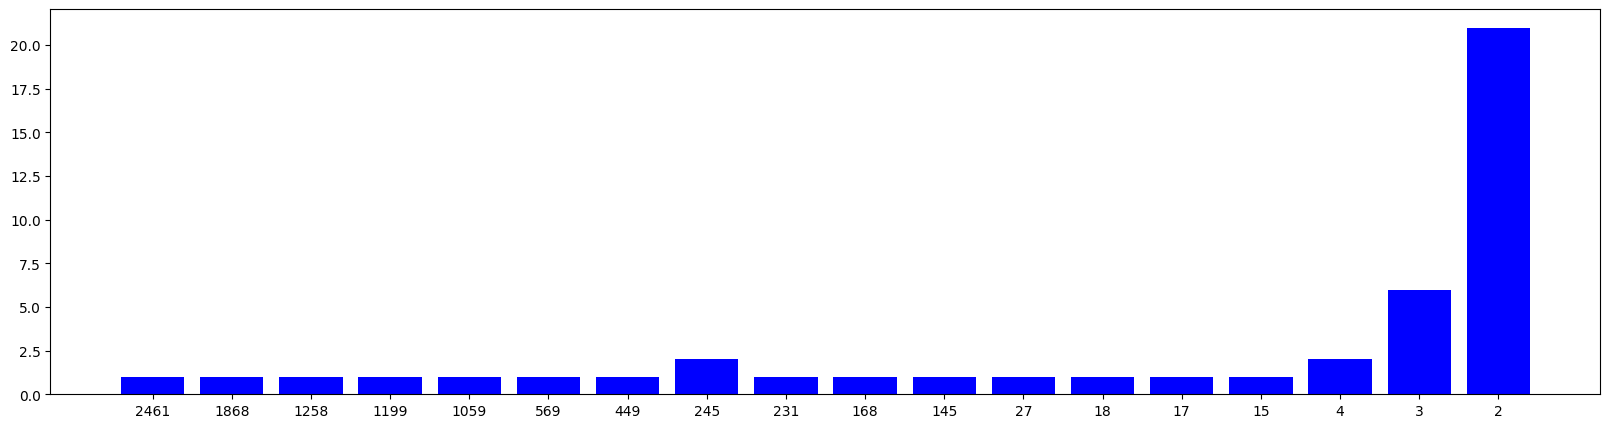

In [34]:
labelprop_tuple = [tuple(x) for x in louvain_coms.communities]
plot_communities_dimentions(labelprop_tuple)

2891


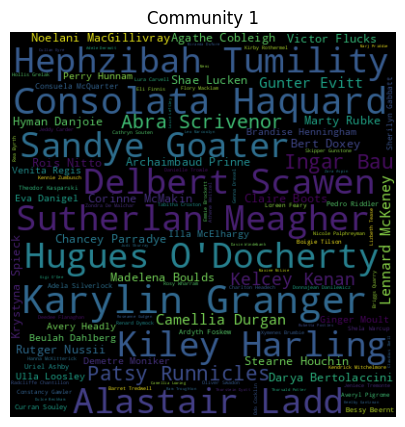

1349


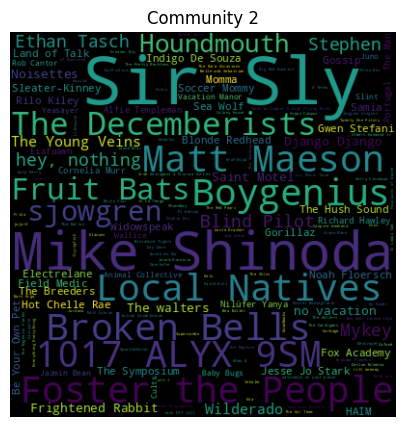

1245


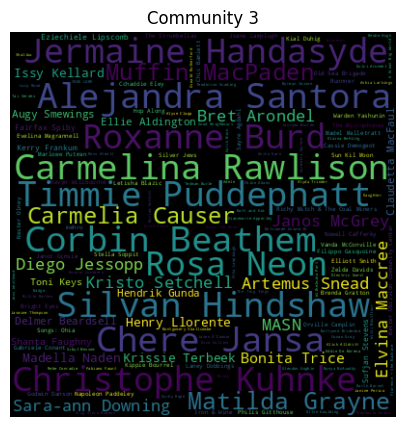

1039


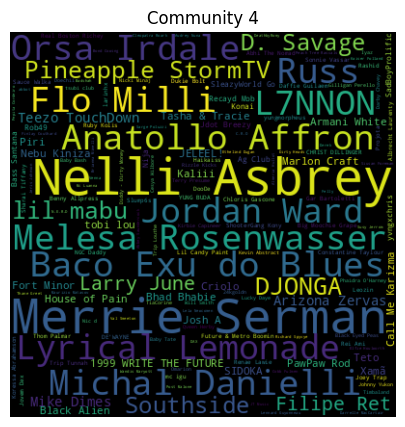

894


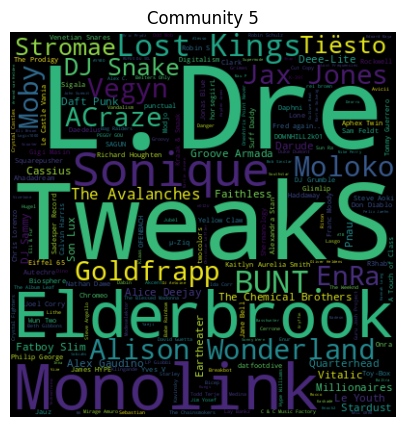

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Supponiamo che louvain_coms.communities sia una lista di liste, dove ogni sottolista contiene i nomi degli artisti di una community
communities = louvain_coms.communities

# Calcola la dimensione di ciascuna community e ordina in ordine decrescente
sorted_communities = sorted(communities, key=len, reverse=True)

# Prendi le prime 5 communities più grandi
top_5_communities = sorted_communities[:5]

# Genera e visualizza il wordcloud per ciascuna delle prime 5 communities
for i, community in enumerate(top_5_communities):
    word_freq = {}
    for artist in community:
        word_freq[artist] = word_freq.get(artist, 0) + 1
    print(len(community))
    # Genera il Wordcloud
    wordcloud = WordCloud(width=400, height=400, background_color='black').generate_from_frequencies(word_freq)

    # Visualizza il Wordcloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Community {i+1}')
    plt.show()

LEIDEN

In [35]:
from cdlib import evaluation

leid_coms = algorithms.leiden(g)

print("Average Internal Degree:", leid_coms.average_internal_degree())
print("Internal Edge Density:", leid_coms.internal_edge_density())
print("Conductance:", leid_coms.conductance())
print("Erdos Renyi Modularity:", leid_coms.erdos_renyi_modularity())
print("Newman Girvan Modularity:", leid_coms.newman_girvan_modularity())
print("Modularity Density:", leid_coms.modularity_density())
print("Z Modularity:", leid_coms.z_modularity())
print("Triangle Partecipation Ratio:", leid_coms.triangle_participation_ratio())

print("N_Community:", len(leid_coms.communities))

max_com_len = 0
for com in leid_coms.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print("Max_Dim_Community:", max_com_len)

Average Internal Degree: FitnessResult(min=1.0, max=335.34443288241414, score=27.242103556584176, std=59.714358250470084)
Internal Edge Density: FitnessResult(min=0.03225009749122579, max=1.0, score=0.6980310923645677, std=0.3798226039611484)
Conductance: FitnessResult(min=0.0, max=0.487750221834534, score=0.06116721120718538, std=0.11076319161677997)
Erdos Renyi Modularity: FitnessResult(min=None, max=None, score=0.666404659920693, std=None)
Newman Girvan Modularity: FitnessResult(min=None, max=None, score=0.6189355834298211, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=897.0736871732371, std=None)
Z Modularity: FitnessResult(min=None, max=None, score=1.5861177158223416, std=None)
Triangle Partecipation Ratio: FitnessResult(min=0.0, max=1.0, score=0.41205296053717627, std=0.47413772938199966)
N_Community: 44
Max_Dim_Community: 1979


In [60]:
leid_coms.overlap

False

In [48]:
coverage_value = calculate_coverage(g, leid_coms.communities)
print(f"Coverage: {coverage_value}")

Coverage: 0.7778666262253043


{'1979': 1, '1440': 1, '1299': 1, '961': 1, '827': 1, '785': 1, '693': 1, '581': 1, '571': 1, '292': 1, '248': 1, '236': 1, '27': 1, '18': 1, '17': 1, '4': 2, '3': 6, '2': 21}


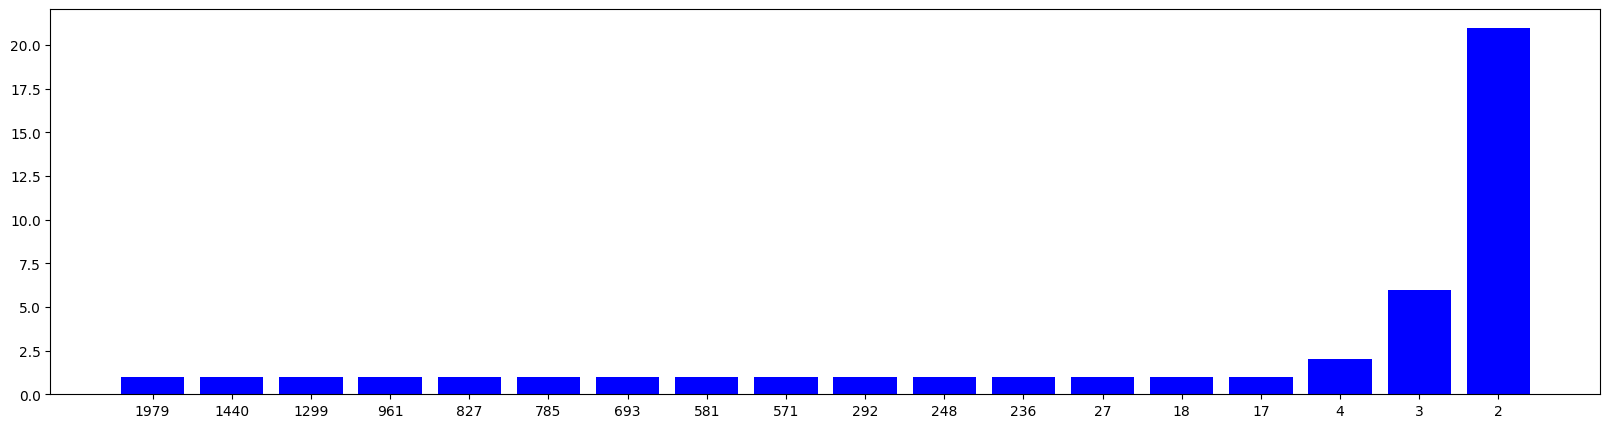

In [36]:
labelprop_tuple = [tuple(x) for x in leid_coms.communities]
plot_communities_dimentions(labelprop_tuple)

INFOMAP

In [37]:
from cdlib import evaluation
coms_info = algorithms.infomap(g)

print("Average Internal Degree:", coms_info.average_internal_degree())
print("Internal Edge Density:", coms_info.internal_edge_density())
print("Conductance:", coms_info.conductance())
print("Erdos Renyi Modularity:", coms_info.erdos_renyi_modularity())
print("Newman Girvan Modularity:", coms_info.newman_girvan_modularity())
print("Modularity Density:", coms_info.modularity_density())
print("Z Modularity:", coms_info.z_modularity())
print("Triangle Partecipation Ratio:", coms_info.triangle_participation_ratio())

print("N_Community:", len(coms_info.communities))

max_com_len = 0
for com in coms_info.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print("Max_Dim_Community:", max_com_len)

Average Internal Degree: FitnessResult(min=1.0, max=355.07675438596493, score=12.98013482915868, std=34.51327202201201)
Internal Edge Density: FitnessResult(min=0.14253873912120568, max=1.0, score=0.6452875013194731, std=0.30008304863930896)
Conductance: FitnessResult(min=0.0, max=0.9411764705882353, score=0.3933935986082697, std=0.26918755792296545)
Erdos Renyi Modularity: FitnessResult(min=None, max=None, score=0.6504630542758302, std=None)
Newman Girvan Modularity: FitnessResult(min=None, max=None, score=0.6021024506229556, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=962.1593202551741, std=None)
Z Modularity: FitnessResult(min=None, max=None, score=1.8552573260898617, std=None)
Triangle Partecipation Ratio: FitnessResult(min=0.0, max=1.0, score=0.5553940613337559, std=0.4511074673425535)
N_Community: 204
Max_Dim_Community: 912


In [61]:
coms_info.overlap

False

In [49]:
coverage_value = calculate_coverage(g, coms_info.communities)
print(f"Coverage: {coverage_value}")

Coverage: 0.6924861787048654


{'912': 1, '727': 1, '673': 1, '667': 1, '642': 1, '638': 1, '538': 1, '444': 1, '340': 1, '319': 1, '282': 1, '274': 1, '233': 1, '179': 1, '177': 1, '158': 1, '141': 1, '128': 1, '125': 1, '120': 1, '114': 2, '112': 1, '88': 1, '67': 1, '62': 1, '60': 1, '57': 1, '53': 2, '52': 1, '50': 1, '47': 1, '46': 3, '40': 1, '38': 1, '36': 2, '34': 1, '31': 1, '30': 1, '29': 1, '28': 1, '27': 3, '26': 2, '24': 1, '20': 2, '19': 1, '18': 3, '17': 3, '16': 1, '15': 1, '14': 2, '13': 2, '12': 3, '11': 4, '10': 1, '9': 4, '8': 2, '7': 9, '6': 7, '5': 7, '4': 19, '3': 28, '2': 54}


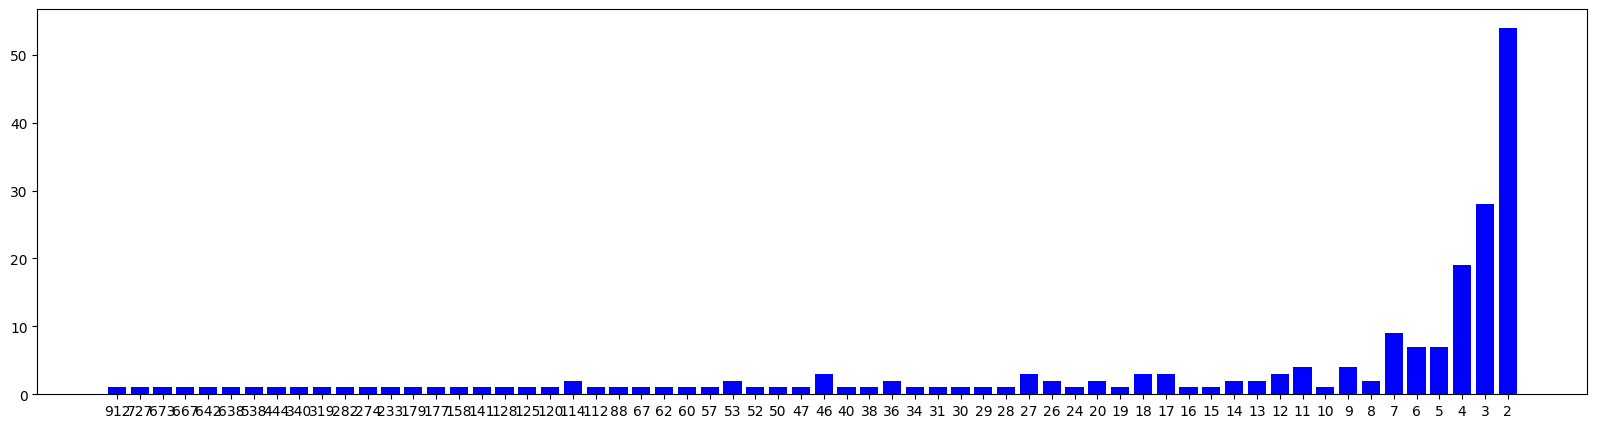

In [38]:
labelprop_tuple = [tuple(x) for x in coms_info.communities]
plot_communities_dimentions(labelprop_tuple)

confronto 4 metodi


In [63]:
from cdlib import viz

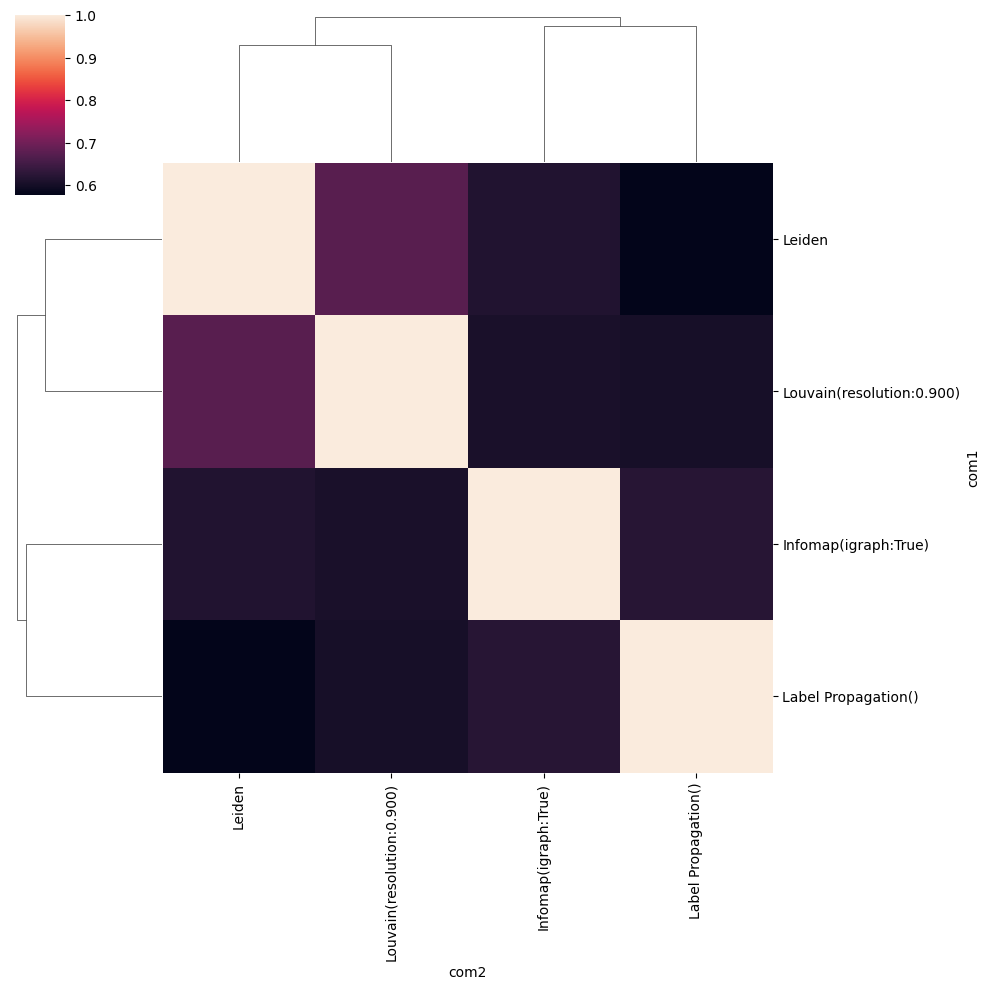

In [64]:
viz.plot_sim_matrix([leid_coms, lp_coms, louvain_coms, coms_info],evaluation.adjusted_mutual_information)

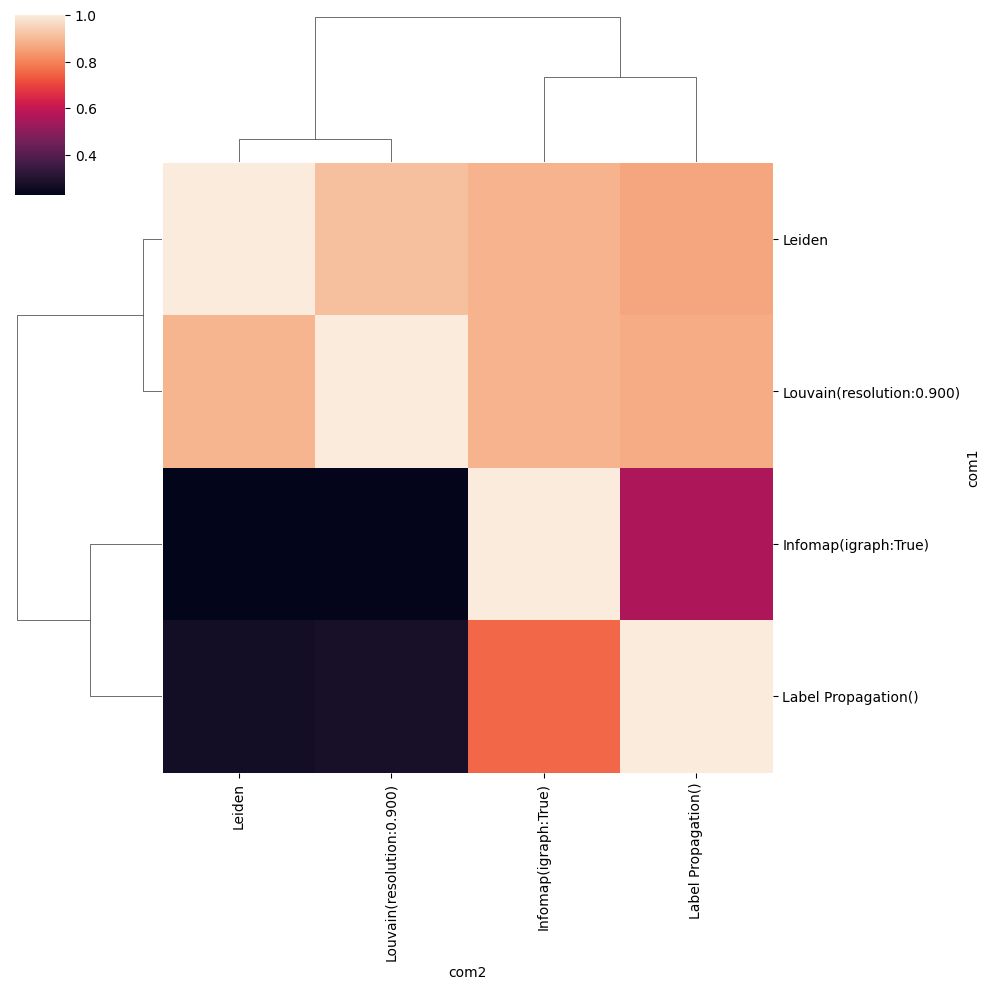

In [65]:
viz.plot_sim_matrix([leid_coms, lp_coms, louvain_coms, coms_info],evaluation.f1)